# Simple Linear Regression

In [143]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [144]:
df = pd.read_csv("C:/Users/Administrator/Desktop/datasets/advertising1D.csv")
df.head()

,expenditure,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


In [145]:
# Prepare data
X = df[['expenditure']]  # Independent variable
y = df['sales']  # Dependent variable

<Axes: xlabel='expenditure', ylabel='sales'>

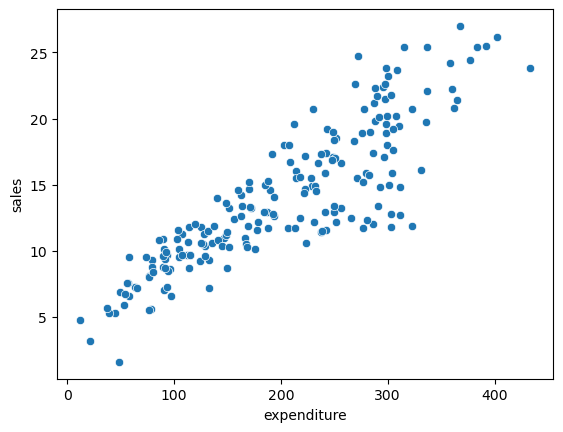

In [146]:
sns.scatterplot(x='expenditure', y='sales', data=df)

In [147]:
# Fit model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [148]:
# Coefficients
beta1 = model.coef_[0]
beta0 = model.intercept_

print("Beta0: {:.1f} \t Beta1: {:.1f}".format(beta0, beta1))

Beta0: 4.2 	 Beta1: 0.0


<Axes: xlabel='expenditure', ylabel='sales'>

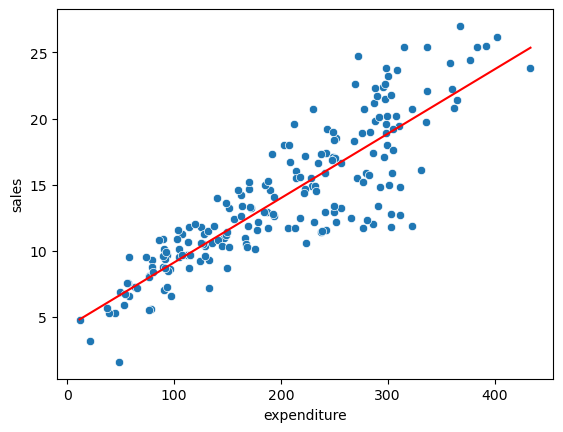

In [171]:
# Plot data and regression line
sns.scatterplot(x='expenditure', y='sales', data=df)

#createing 100 evenly spaced x-values between the min and max values of the 'expenditure' column in the DataFrame df
#np.linspace(start, stop, num) generates num values from start to stop linearly.
xpointsofline = np.linspace(df['expenditure'].min(), df['expenditure'].max(), 100)

#Calculating the y-values of the line that correspond to those xpointsoffline values — together they form the regression line.
# This is the equation of a straight line
ypointsofline = beta0 + (beta1 * xpointsofline)
sns.lineplot(x=xpointsofline, y=ypointsofline, color='red')

1. The red regression line fits well through the data.
2. Points are mostly scattered close to the line, indicating a strong linear relationship between expenditure and sales.
3. The spread of points increases slightly at higher expenditure values → this may hint at slight heteroscedasticity (non-constant variance).
4. Model effectively captures the positive linear trend between expenditure and sales.

In [150]:
# Predict a point
expnd = 350.6
sales = beta0 + beta1 * expnd
print("If expenditure is {:.1f}, then sales will be {:.1f}".format(expnd, sales))

If expenditure is 350.6, then sales will be 21.3


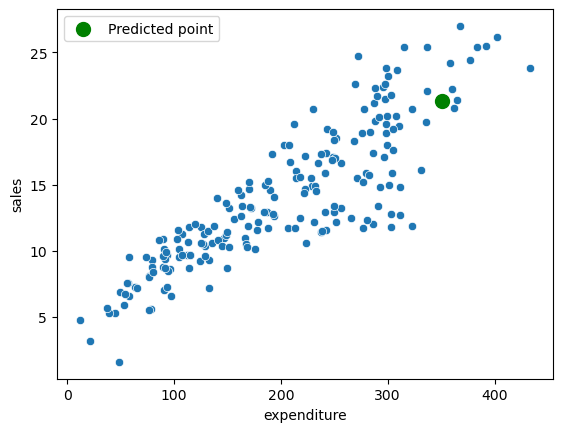

In [151]:
# Plot predicted point
sns.scatterplot(x='expenditure', y='sales', data=df)
plt.scatter(expnd, sales, color='green', s=100, label='Predicted point')
plt.legend()
plt.show()

## Model Evaluation

### 1. Make Predictions

In [172]:
y_hat = model.predict(X)
y_hat # y_hat contains predicted y (output) values

array([20.67294913, 10.48008171, 10.65143155, 16.47243028, 16.40878606,
       10.66122297,  9.74082956, 11.58161637,  4.74231004, 15.11631872,
        8.87428896, 16.05139926, 10.27935762,  9.66739391, 18.02437023,
       18.66081248, 14.86174182, 22.61654585,  9.4568784 , 13.48604742,
       18.83216232, 17.1920996 ,  8.02243548, 17.45646792,  8.73231338,
       18.16634581, 13.21678339, 17.86281181, 18.79789235, 10.40664607,
       22.00947786, 12.43836556, 10.47029029, 18.16634581,  9.28552856,
       19.01819928, 19.62526728, 12.48242694,  9.3051114 , 18.74403955,
       16.72211147, 16.36472467, 19.98754979, 16.00244216,  8.77637476,
       15.38558275, 10.79340713, 18.85174516, 18.50904548,  9.81916091,
       15.79682236,  9.73103814, 18.74403955, 18.24467716, 19.21892338,
       19.26298476,  7.929417  , 12.59013256, 18.76362238, 16.38430751,
        7.93431271, 21.73042241, 17.98030884, 11.05777545, 14.09801112,
        8.04691403,  7.02371072, 12.19847579, 17.67677485, 18.26

### 2. Calculate evaluation metrices

In [156]:
# Evaluation metrics
print("Model Evaluation:")

mae = mean_absolute_error(y, y_hat)
print(f"MAE  : {mae:.2f}")

mse = mean_squared_error(y, y_hat)
print(f"MSE  : {mse:.2f}")

rmse = np.sqrt(mse)
print(f"RMSE : {rmse:.2f}")

r2 = r2_score(y, y_hat)
print(f"R²   : {r2:.2f}")

Model Evaluation:
MAE  : 1.95
MSE  : 6.69
RMSE : 2.59
R²   : 0.75


1. MAE:  On average, sales predictions are off by about 1.95 units.
2. MSE:  Larger errors are penalized more. Useful for optimization but less interpretable directly.
4. RMSE: Shows typical error magnitude. Predictions deviate by about 2.59 units from actual sales.
5. R²: 	 The model explains 75% of the variation in sales based on expenditure. This indicates a strong linear relationship.

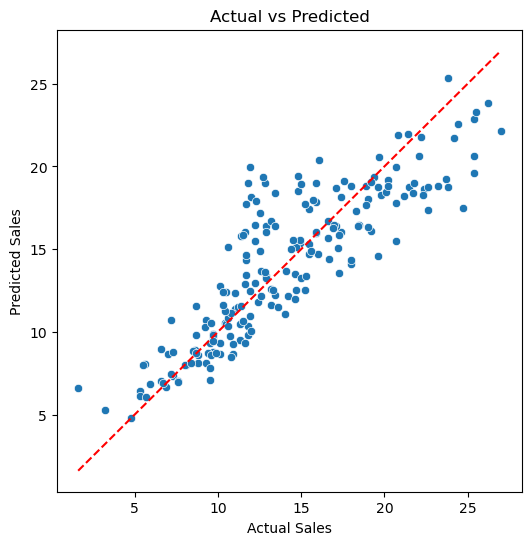

In [157]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_hat)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # perfect prediction line
plt.show()

1. Dots close to the red line → Your model predicted those values well.
2. Symmetry around the red line → Errors are evenly distributed (no bias).
3. No clear pattern in the spread → Residuals appear random (good assumption fit).
4. Most of the dots cluster closely around the red line, which is a positive sign.
5. Some variance exists, especially for higher actual values, but it’s not too fa off — suggesting:
( Good linearity, 
Acceptable model fit and that the 
Predictive capability is fairly strong )

## Residual plot/ Residual analysis

In [158]:
# Calculate residuals
residuals = y - y_hat #y_hat is the predicted output

### 1. Plot Residuals vs Fitted Values

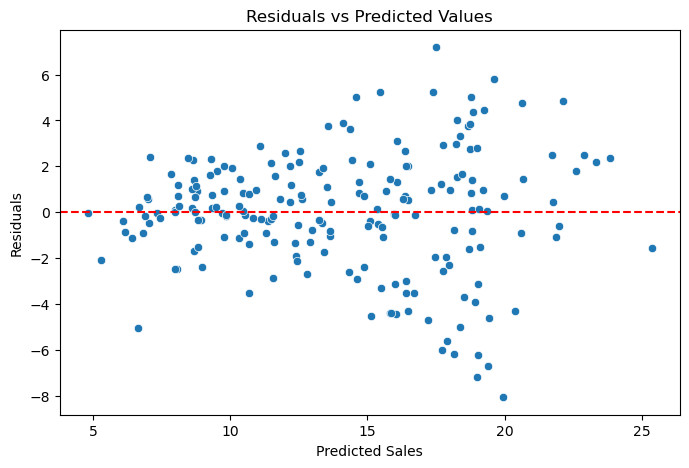

In [159]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_hat, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

1. Residuals center around 0, which is good — no significant systematic bias.
2. There's no strong curved pattern, suggesting linearity assumption is mostly fine.

### 2. Histogram of Residuals

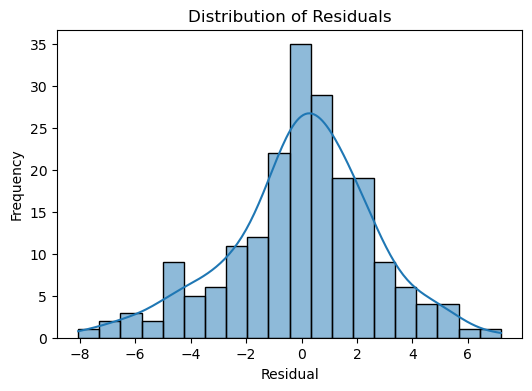

In [160]:
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

1. The histogram is roughly bell-shaped and centered around zero, which is a good sign.
2. The smooth curve overlay suggests approximate normality, though it’s a bit left-skewed.
3. A few residuals lie far from the center (some as low as -8 or as high as 6), indicating some outliers.

### 3. Q-Q Plot (for normality check)

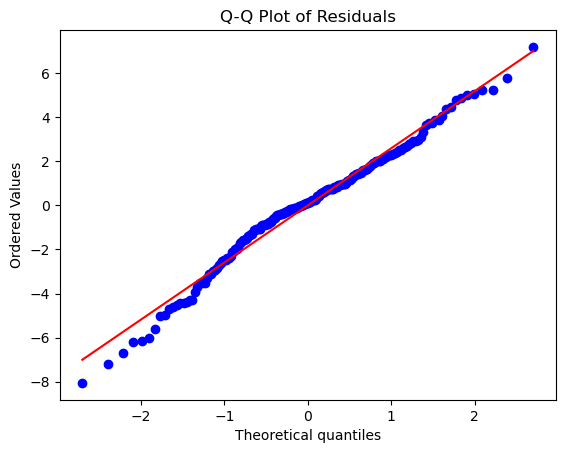

In [161]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


1. The blue points mostly follow the red line, which supports the idea that residuals are approximately normally distributed.
2. Deviations at the tails (ends of the curve) show slight non-normality — possibly heavier tails or a few extreme outliers.

##### Summary table of residuals

In [162]:
residual_df = pd.DataFrame({'Actual': y, 'Predicted': y_hat, 'Residual': residuals})
print(residual_df.head())


   Actual  Predicted  Residual
0    22.1  20.655712  1.444288
1    10.4  10.518896 -0.118896
2     9.3  10.689303 -1.389303
3    18.5  16.478292  2.021708
4    12.9  16.414998 -3.514998


## Answering certain Questions

Q1. is there any relationship ?

In [163]:
correlation = df['expenditure'].corr(df['sales'])
print(f"Correlation coefficient: {correlation:.2f}")
# Yes, there's a clear positive trend in regression and correlation. 
#Also, 0.87 means there is a strong relationship.

Correlation coefficient: 0.87


Q2. How Strong Is the Relationship?

In [164]:
print(f"R²   : {r2:.2f}")
# Model explains 72% of the variation in sales using expenditure.

R²   : 0.75


Q3. Is the Relationship Linear?

Mostly, but residuals show that there is some non-constant variance.

Q4. How accurately can we predict?	

The residual plot suggests the relationship is mostly linear, 
but the increasing variance means predictions 
are slightly less reliable at higher sales levels.
And the errors are reasonably small (±2.59), but not negligible

## Model train_test_split

In [165]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
# Fit model only on training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [169]:
# Predict on test data
y_pred = model.predict(X_test)

In [170]:
# Evaluate on test data
print("Test Set Evaluation:")

mae = mean_absolute_error(y_test, y_pred)
print("MAE  :", round(mae, 2))

mse = mean_squared_error(y_test, y_pred)
print("MSE  :", round(mse, 2))

rmse = np.sqrt(mse)
print("RMSE :", round(rmse, 2))

r2 = r2_score(y_test, y_pred)
print("R²   :", round(r2, 2))

Test Set Evaluation:
MAE  : 2.09
MSE  : 7.78
RMSE : 2.79
R²   : 0.75


## Conclusion

| Metric   | **Train Set** | **Test Set** |  **What It Tells Us**                                                              |
| -------- | ------------- | ------------ | ------------------------------------------------------------------------------------ |
| **MAE**  | 1.95          | 2.09         | Test error is only slightly higher — model generalizes well.                         |
| **MSE**  | 6.69          | 7.78         | Slight increase on test set is expected — no overfitting.                            |
| **RMSE** | 2.59          | 2.79         | Test predictions deviate slightly more, but still close.                             |
| **R²**   | 0.75          | 0.75         | Your model explains **75% of sales variability** on both sets — **very stable fit**. |


The model has a consistent performance, as it performs almost equally on both training and test sets.

If the test R² had dropped significantly (e.g., from 0.75 to 0.5), it would mean overfitting — but we're safe.

Reliable predictions: Since the RMSE is only ~0.2 units higher on the test set, we can trust it to predict future sales within ±2.8 units, on average.

Our model is not perfectcuz while 75% of the variation in sales is explained by expenditure, there's still 25% unexplained — possibly due to:
1. Non-linear trends
2. Missing variables (like channel, seasonality, market factors)

# Note:

You might be thinking these are just notes... or that I copied them from one of the notebooks shared by Sir Saleem… or perhaps from some other magical source.
But—ahem ahem—allow me to stop you right there, Sir.
Because what you’ve just witnessed is not some borrowed script or second-hand scribbles.
No, this detailed, well-structured masterpiece was crafted from scratch, with dedication, determination, and just the tiniest sprinkle of help from ChatGPT.
And yes—drumroll, please—the proud author of this work is none other than WARDA ALI herself. 😌🎓